# Proyecto 2
- Jimena Hernandez - 21199
- Mark Albrand - 21004
- Alejandro Azurdia - 21242
- Diego Morales - 21146
- Angel Castellanos - 21700


## Análisis exploratorio

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Cargando los datos

In [3]:
df_prompts_test = pd.read_csv('data/prompts_test.csv')
df_prompts_train = pd.read_csv('data/prompts_train.csv')
df_sample_submission = pd.read_csv('data/sample_submission.csv')
df_summaries_test = pd.read_csv('data/summaries_test.csv')
df_summaries_train = pd.read_csv('data/summaries_train.csv')

### Visualizando los datos

In [4]:
df_prompts_test.head()


,prompt_id,prompt_question,prompt_title,prompt_text
0,abc123,Summarize...,Example Title 1,Heading\nText...
1,def789,Summarize...,Example Title 2,Heading\nText...


In [5]:
df_prompts_train.head()

,prompt_id,prompt_question,prompt_title,prompt_text
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
1,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
2,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."


In [6]:
df_sample_submission.head()

,student_id,content,wording
0,000000ffffff,0.0,0.0
1,111111eeeeee,0.0,0.0
2,222222cccccc,0.0,0.0
3,333333dddddd,0.0,0.0


In [7]:
df_summaries_test.head()

,student_id,prompt_id,text
0,000000ffffff,abc123,Example text 1
1,111111eeeeee,def789,Example text 2
2,222222cccccc,abc123,Example text 3
3,333333dddddd,def789,Example text 4


In [8]:
df_summaries_train.head()

,student_id,prompt_id,text,content,wording
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757


### Merge entre los datos de entrenamiento

In [9]:
df_train = df_summaries_train.merge(df_prompts_train, on='prompt_id')
print("Train shape: ", df_train.shape)

Train shape:  (7165, 8)


In [10]:
df_train.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...


### Descripción de los datos

In [11]:
df_train.describe()

,content,wording
count,7165.000000,7165.000000
mean,-0.014853,-0.063072
std,1.043569,1.036048
min,-1.729859,-1.962614
25%,-0.799545,-0.872720
50%,-0.093814,-0.081769
75%,0.499660,0.503833
max,3.900326,4.310693


Hay 7165 datos en content y wording, lo que significa que ninguna tiene valores nulos.

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7165 entries, 0 to 7164
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   student_id       7165 non-null   object 
 1   prompt_id        7165 non-null   object 
 2   text             7165 non-null   object 
 3   content          7165 non-null   float64
 4   wording          7165 non-null   float64
 5   prompt_question  7165 non-null   object 
 6   prompt_title     7165 non-null   object 
 7   prompt_text      7165 non-null   object 
dtypes: float64(2), object(6)
memory usage: 447.9+ KB


### Descripción de las variables

| **Variable**        | **Tipo de Dato** | **Clasificación**          | **Escala de Medición** |
|---------------------|------------------|----------------------------|------------------------|
| `student_id`        | object           | Cualitativa                 | Nominal                |
| `prompt_id`         | object           | Cualitativa                 | Nominal                |
| `text`              | object           | Cualitativa                 | Nominal                |
| `content`           | float64          | Cuantitativa                | Continua               |
| `wording`           | float64          | Cuantitativa                | Continua               |
| `prompt_question`   | object           | Cualitativa                 | Nominal                |
| `prompt_title`      | object           | Cualitativa                 | Nominal                |
| `prompt_text`       | object           | Cualitativa                 | Nominal                |

### Variables cuantitativas

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


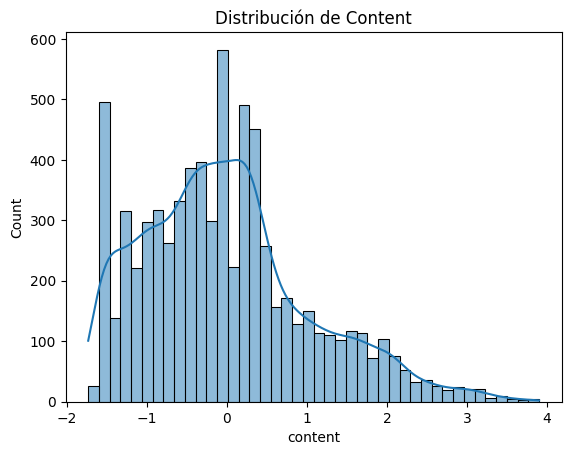

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


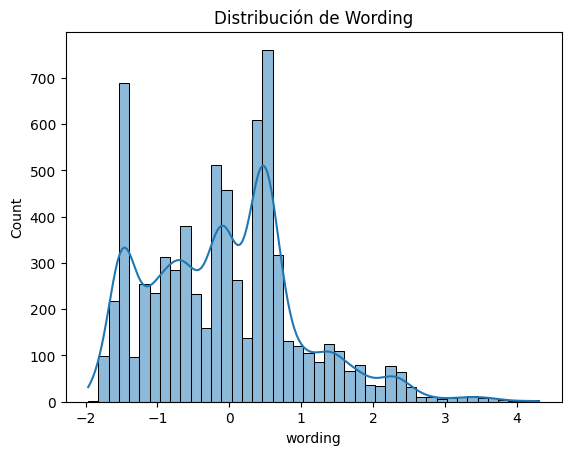

In [13]:
# Histograma para la columna 'content'
sns.histplot(df_train['content'], kde=True)
plt.title('Distribución de Content')
plt.show()

# Histograma para la columna 'wording'
sns.histplot(df_train['wording'], kde=True)
plt.title('Distribución de Wording')
plt.show()


La mayor parte de los valores de content están distribuidos entre -2 y 4, con una concentración  alrededor de 0. La variable wording tiene una forma más dispersa que la de content, con varios picos más definidos y una concentración central también cerca de 0.

Vemos picos en ambas que podrían indicar evaluaciones más específicas o casos de outliers.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


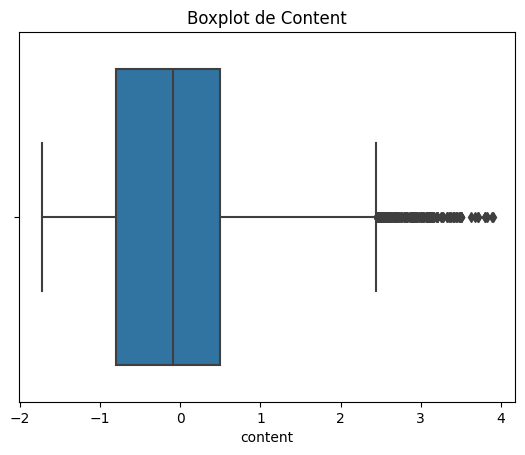

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


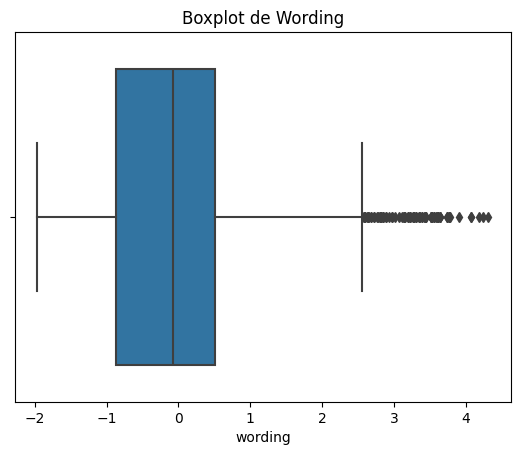

In [14]:
sns.boxplot(x=df_train['content'])
plt.title('Boxplot de Content')
plt.show()

sns.boxplot(x=df_train['wording'])
plt.title('Boxplot de Wording')
plt.show()


Se observan outliers en el extremo derecho en ambas gráficas, por lo que existen respuestas o textos que fueron evaluados significativamente mejor en comparación con la mayoría.

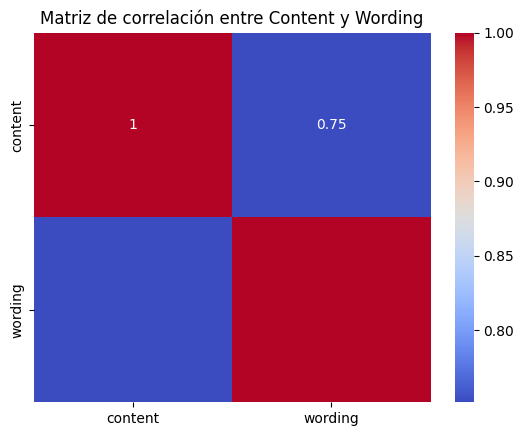

In [15]:
correlation_matrix = df_train[['content', 'wording']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre Content y Wording')
plt.show()

Las evaluaciones de contenido y redacción están fuertemente relacionadas, lo que nos indica que los estudiantes que tienen una buena redacción también tienen un buen contenido.

### Variables cualitativas

In [16]:
cualitative_columns = ['student_id', 'prompt_id', 'text', 'prompt_question', 'prompt_title', 'prompt_text']

In [17]:
for column in cualitative_columns:
    print(f"Unique values for {column}: {df_train[column].nunique()}")

Unique values for student_id: 7165
Unique values for prompt_id: 4
Unique values for text: 7165
Unique values for prompt_question: 4
Unique values for prompt_title: 4
Unique values for prompt_text: 4


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


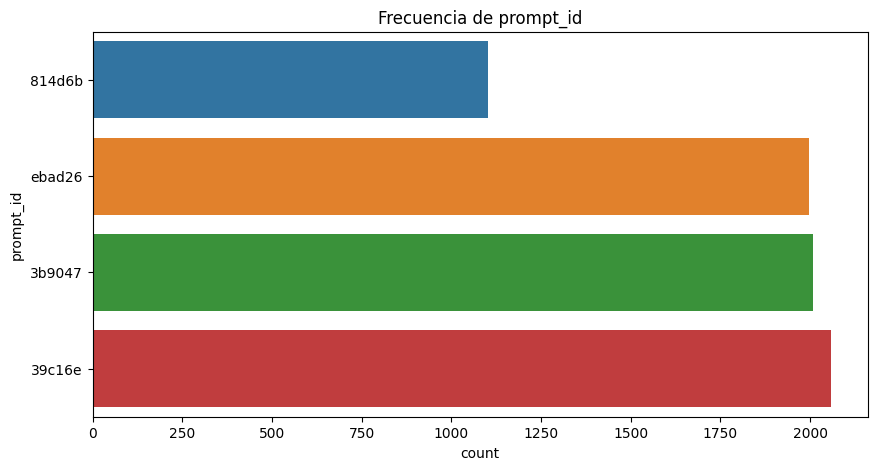

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


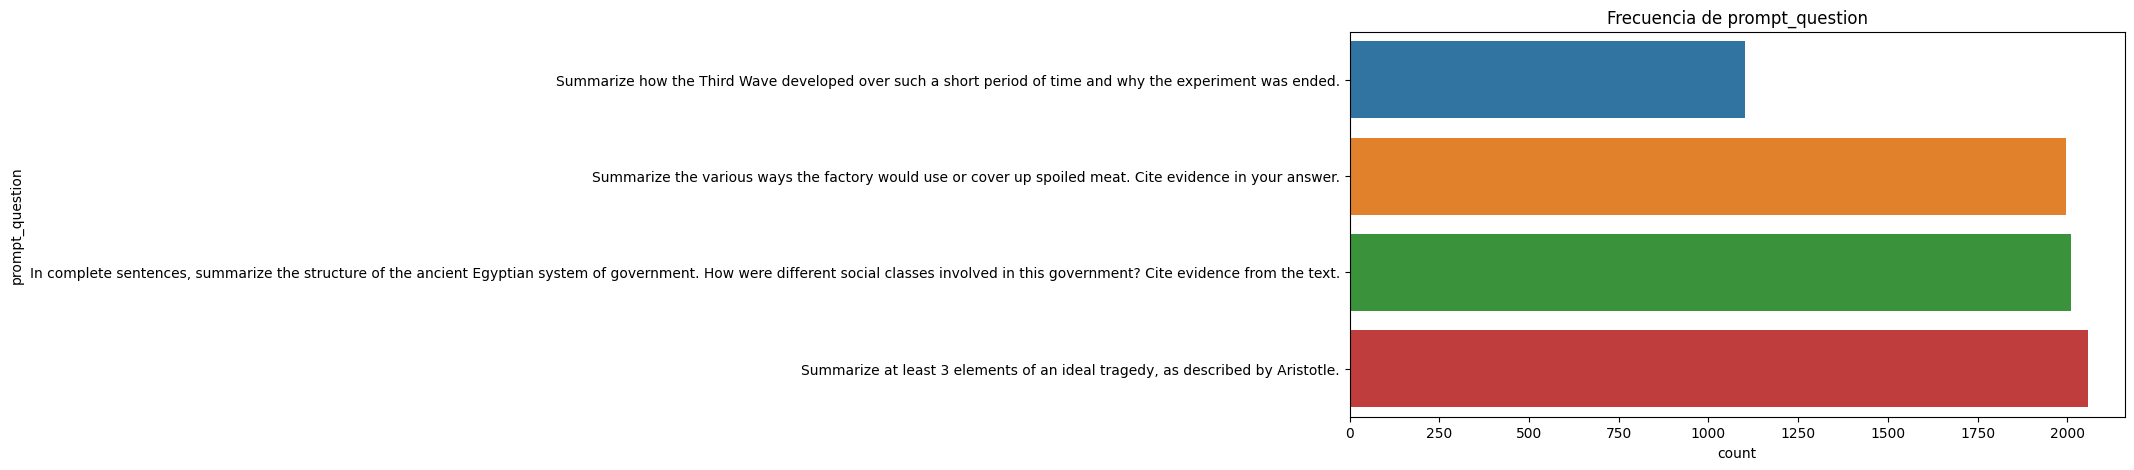

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


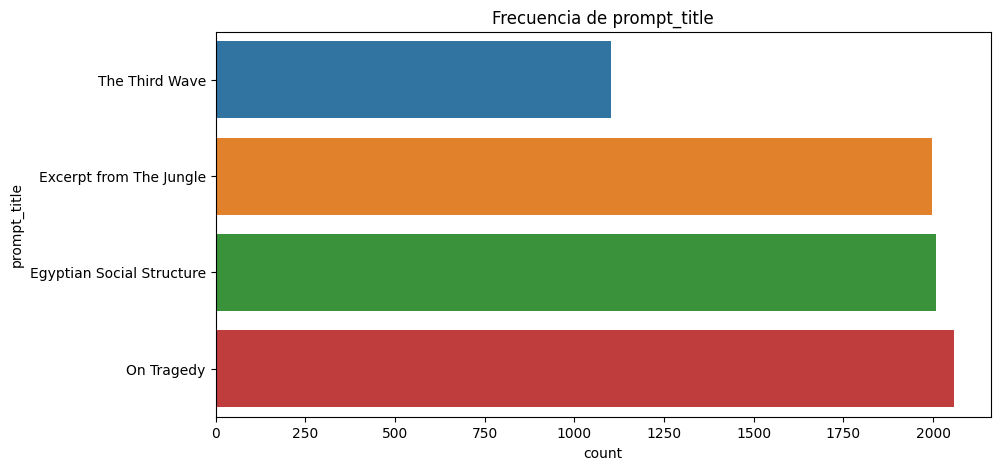

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
) missing from current font.ramework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarni

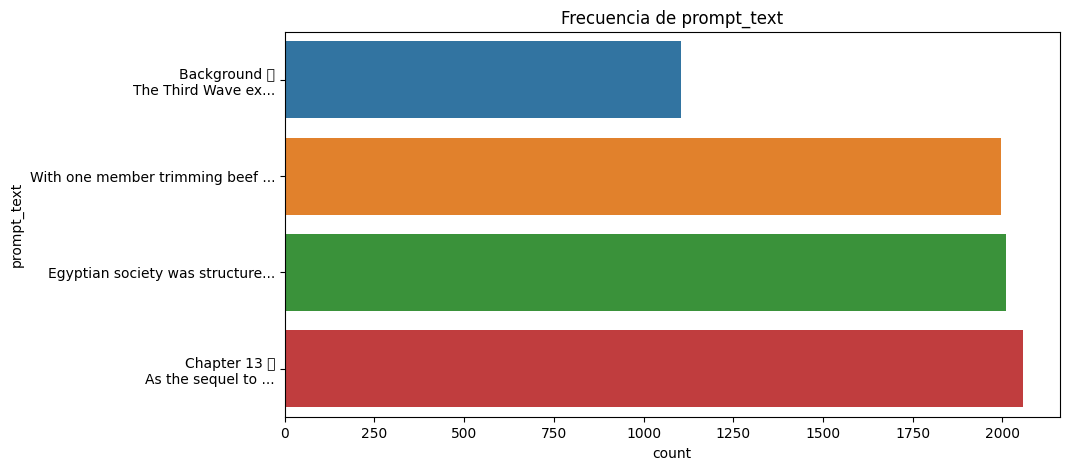

In [18]:
# Definir una función para truncar textos largos
def truncate_text(text, max_length=30):
    return text if len(text) <= max_length else text[:max_length] + '...'

frequency_tables = ['prompt_id', 'prompt_question', 'prompt_title', 'prompt_text']

for column in frequency_tables:
    plt.figure(figsize=(10, 5))
    
    # Si la columna es 'prompt_text', truncar los textos largos
    if column == 'prompt_text':
        df_train[column] = df_train[column].apply(lambda x: truncate_text(x))
    
    sns.countplot(data=df_train, y=column)
    plt.title(f'Frecuencia de {column}')
    plt.show()


### Merge entre los datos de prueba

In [19]:
df_test = df_summaries_test.merge(df_prompts_test, on='prompt_id')
print("Test shape: ", df_test.shape)

Test shape:  (4, 6)


In [20]:
df_test.head()

,student_id,prompt_id,text,prompt_question,prompt_title,prompt_text
0,000000ffffff,abc123,Example text 1,Summarize...,Example Title 1,Heading\nText...
1,222222cccccc,abc123,Example text 3,Summarize...,Example Title 1,Heading\nText...
2,111111eeeeee,def789,Example text 2,Summarize...,Example Title 2,Heading\nText...
3,333333dddddd,def789,Example text 4,Summarize...,Example Title 2,Heading\nText...


In [21]:
df_test = df_summaries_test.merge(df_prompts_test, on='prompt_id')
print("Train shape: ", df_train.shape)

Train shape:  (7165, 8)


In [22]:
df_test.head()

,student_id,prompt_id,text,prompt_question,prompt_title,prompt_text
0,000000ffffff,abc123,Example text 1,Summarize...,Example Title 1,Heading\nText...
1,222222cccccc,abc123,Example text 3,Summarize...,Example Title 1,Heading\nText...
2,111111eeeeee,def789,Example text 2,Summarize...,Example Title 2,Heading\nText...
3,333333dddddd,def789,Example text 4,Summarize...,Example Title 2,Heading\nText...


### Descripción de los datos

In [23]:
df_test.describe()

,student_id,prompt_id,text,prompt_question,prompt_title,prompt_text
count,4,4,4,4,4,4
unique,4,2,4,1,2,1
top,000000ffffff,abc123,Example text 1,Summarize...,Example Title 1,Heading\nText...
freq,1,2,1,4,2,4


Hay 4 datos en todas las columnas, indicando así que no hay datos nulos.

In [24]:
df_test.describe()

,student_id,prompt_id,text,prompt_question,prompt_title,prompt_text
count,4,4,4,4,4,4
unique,4,2,4,1,2,1
top,000000ffffff,abc123,Example text 1,Summarize...,Example Title 1,Heading\nText...
freq,1,2,1,4,2,4


In [25]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   student_id       4 non-null      object
 1   prompt_id        4 non-null      object
 2   text             4 non-null      object
 3   prompt_question  4 non-null      object
 4   prompt_title     4 non-null      object
 5   prompt_text      4 non-null      object
dtypes: object(6)
memory usage: 324.0+ bytes


In [26]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   student_id       4 non-null      object
 1   prompt_id        4 non-null      object
 2   text             4 non-null      object
 3   prompt_question  4 non-null      object
 4   prompt_title     4 non-null      object
 5   prompt_text      4 non-null      object
dtypes: object(6)
memory usage: 324.0+ bytes


| **Variable**        | **Tipo de Dato** | **Clasificación**          | **Escala de Medición** |
|---------------------|------------------|----------------------------|------------------------|
| `student_id`        | object           | Cualitativa                 | Nominal                |
| `prompt_id`         | object           | Cualitativa                 | Nominal                |
| `text`              | object           | Cualitativa                 | Nominal                |
| `prompt_question`   | object           | Cualitativa                 | Nominal                |
| `prompt_title`      | object           | Cualitativa                 | Nominal                |
| `prompt_text`       | object           | Cualitativa                 | Nominal                |
| `content`           | float64          | Cuantitativa                | Nominal                |
| `wording`           | float64          | Cuantitativa                | Nominal                |

## Limpieza

En el análisis exploratorio se determinó que el conjunto de datos no posee datos faltantes, por lo que la única limpieza que se necesitará será asegurarse que en los textos no se tengan símbolos fuera del abecedario, y mantener todas las letras en minúsculas.

In [27]:
#df_test['text'] = df_test['text'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)
#df_test['text'] = df_test['text'].str.lower()
#f_test.drop(columns=['student_id', 'prompt_id'], inplace=True)

df_test.head()

,student_id,prompt_id,text,prompt_question,prompt_title,prompt_text
0,000000ffffff,abc123,Example text 1,Summarize...,Example Title 1,Heading\nText...
1,222222cccccc,abc123,Example text 3,Summarize...,Example Title 1,Heading\nText...
2,111111eeeeee,def789,Example text 2,Summarize...,Example Title 2,Heading\nText...
3,333333dddddd,def789,Example text 4,Summarize...,Example Title 2,Heading\nText...


In [28]:
#df_train['text'] = df_train['text'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)
#df_train['text'] = df_train['text'].str.lower()
#df_train.drop(columns=['prompt_id'], inplace=True)

df_train.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...


# Feature Engineering

- Cantidad de palabras
- Longitud del texto 
- Signos de puntuación
- Cantidad de números en el texto

In [29]:
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')
print(stopwords.words('english'))
stops = set(stopwords.words('english'))
print(stops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>


In [30]:
# Crear nuevos campos: longitud de los textos, cantidad de palabras, cantidad de numeros y stopwords
df_train['text_length'] = df_train['text'].apply(len)
df_train['word_count'] = df_train['text'].apply(lambda x: len(x.split()))
df_train['number_count'] = df_train['text'].apply(lambda x: len([word for word in x.split() if word.isnumeric()]))
# para las puntuaciones, iterar por cada caracter de cada palabra de cada texto y verificar si es una puntuación
df_train['punctuation_count'] = df_train['text'].apply(lambda x: len([char for char in x if char in ['.', ',', '!', '?', ';', ':', '-', '(', ')', '"', "'"]]))
df_train['stopword_count'] = df_train['text'].apply(lambda x: len([word for word in x.split() if word in stopwords.words('english')]))

In [31]:
df_train.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,text_length,word_count,number_count,punctuation_count,stopword_count
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,346,61,0,3,21
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,1225,203,3,29,79
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,345,60,0,9,24
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,451,76,0,10,33
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,145,27,0,2,10


### Guardando los datos limpios

In [32]:
# guardar a un archivo csv
df_train.to_csv('data/Finaltrain.csv', index=False)

#### Graficando las features obtenidas de feature engineering

In [33]:
FEATURE_COLUMNS = df_train.drop(columns = ['student_id', 'prompt_id', 'text', 'prompt_question', 
                                           'prompt_title', 'prompt_text', 'content', 'wording'], axis = 1).columns.to_list()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

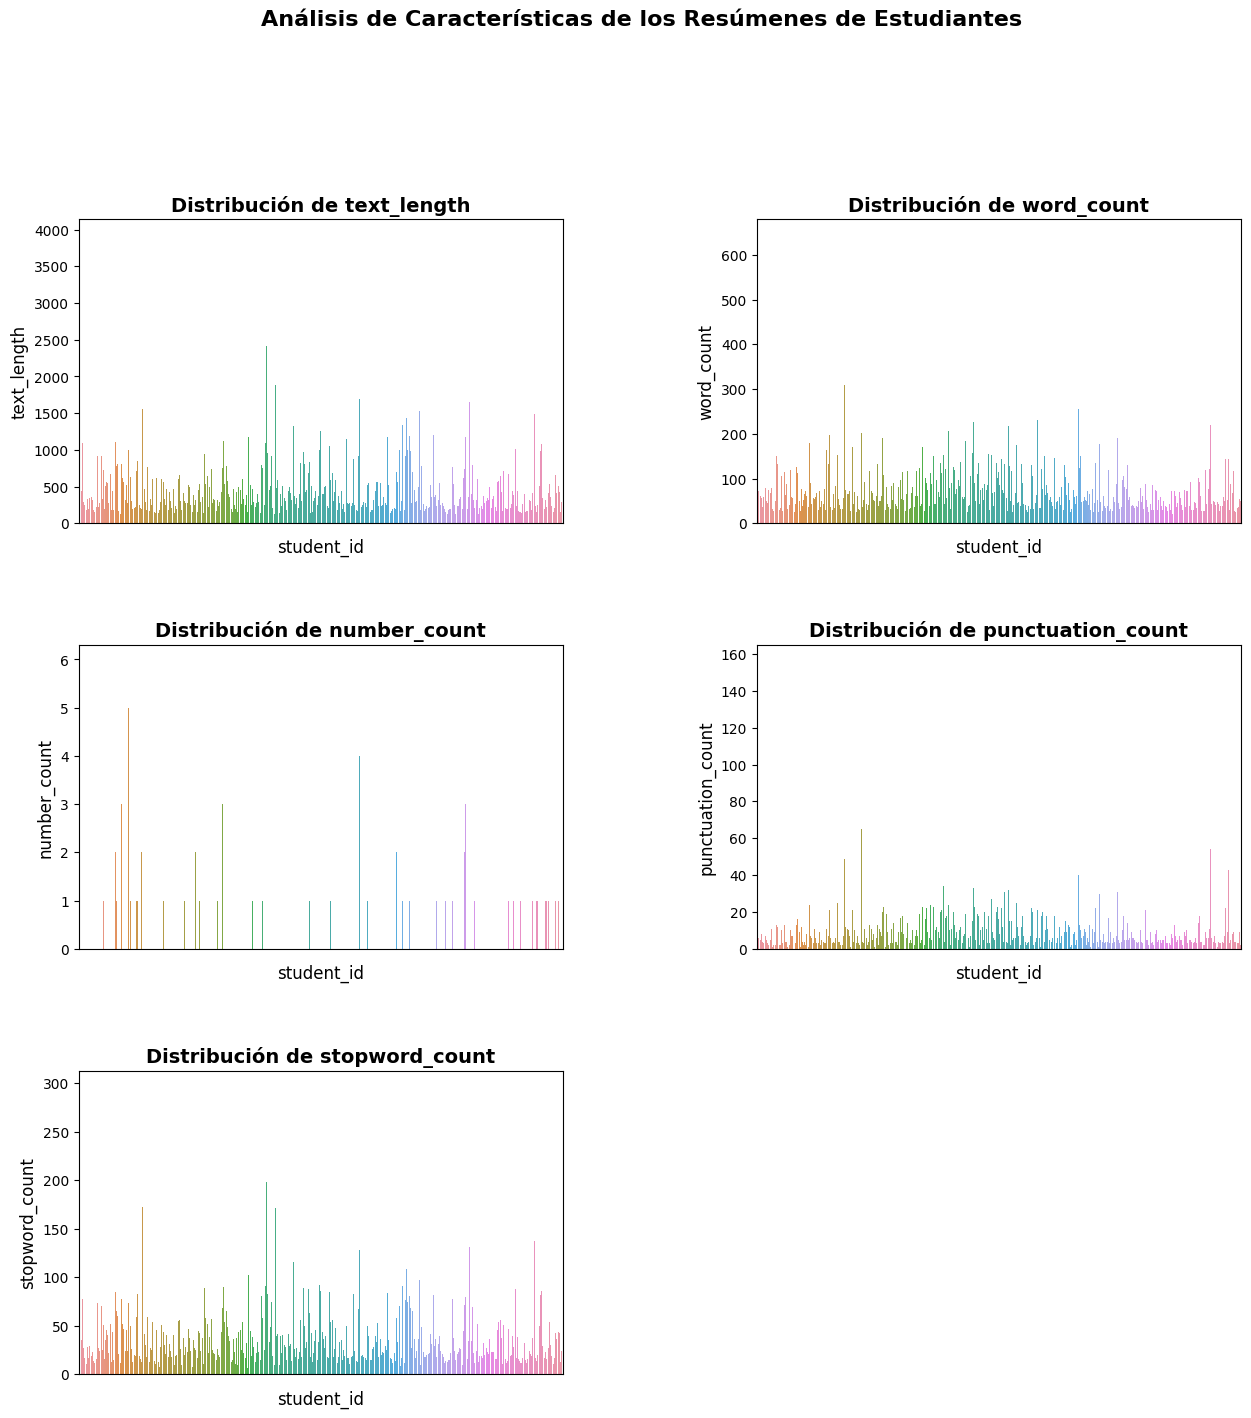

In [35]:
figure, axes = plt.subplots(3, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for i, column_name in enumerate(FEATURE_COLUMNS):
    row = i//2
    col = i % 2
    bp = sns.barplot(ax=axes[row, col], x=df_train['student_id'], y=df_train[column_name])
    bp.set(xticklabels=[], xlabel=None)
    axes[row, col].set_title(f"Distribución de {column_name}", fontsize=14, fontweight='bold')
    axes[row, col].set_ylabel(column_name, fontsize=12)
    axes[row, col].set_xlabel('student_id', fontsize=12)
    axes[row, col].tick_params(axis='y', labelsize=10)
    axes[row, col].tick_params(axis='x', bottom=False)

axes[2, 1].set_visible(False)

figure.suptitle('Análisis de Características de los Resúmenes de Estudiantes', fontsize=16, fontweight='bold', y=1.02)



plt.show()
